Enhancing Scraping, and Graphical Growth Analysis
================================================================

Importing Libraries

In [93]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
import time
import csv
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import re

User Input and WebDriver Setup

In [94]:
def get_channel_name():
    return input("Give me your channel name: ")

def setup_webdriver():
    driver = webdriver.Chrome()
    driver.get("https://www.youtube.com/")
    return driver

Search and Navigate to YouTube Channel

In [95]:
def search_and_navigate_channel(driver, channel_name):
    search_box = driver.find_element(By.NAME, "search_query")
    search_box.send_keys(channel_name)
    time.sleep(1)
    search_box.send_keys(Keys.RETURN)
    time.sleep(1)


    channel_link = driver.find_element(By.ID, "subscribers")
    time.sleep(1)
    channel_link.click()
    time.sleep(1)

   
    videos_tab = driver.find_element(By.XPATH, '//*[@id="tabsContent"]/yt-tab-group-shape/div[1]/yt-tab-shape[2]')
    time.sleep(1)
    videos_tab.click()
    driver.maximize_window()
    time.sleep(1)


    print(channel_link.text)

    return driver

Scroll, Extract, and Collect Video Data

In [96]:
def scroll_and_extract_data(driver):
    # Scroll down to load more videos
    SCROLL_PAUSE_TIME = 0.5
    for i in range(20):  # Adjust the range as needed
        driver.execute_script('window.scrollBy(0, 1000)')
        time.sleep(SCROLL_PAUSE_TIME)

   
    videos = driver.find_elements(By.ID, 'content')
    
    video_data = {}

    for index, video in enumerate(videos):
        try:
            title = video.find_element(By.ID, "video-title")
            views = video.find_element(By.CLASS_NAME, "inline-metadata-item")

            title_text = title.text
            views_text = views.text

            video_data[index] = {'title': title_text, 'views': views_text}
        except Exception as e:
            pass
           

    return video_data

Create CSV File from Video Data

In [97]:
def create_csv(video_data, channel_name):
    csv_file_path = f'{channel_name}_video_data.csv'
    with open(csv_file_path, 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = ['Index', 'Title', 'Views']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()

        
        auto_incremented_index = 1

        for index, data in video_data.items():
            # Check if both 'Title' and 'Views' fields are not empty before writing to CSV
            if data['title'] and data['views']:
                writer.writerow({'Index': auto_incremented_index, 'Title': data['title'], 'Views': data['views']})
                auto_incremented_index += 1

    print(f"Data has been successfully written to {csv_file_path}")
    return csv_file_path

Reading, Displaying, and Analyzing Video Data

In [98]:
%matplotlib inline
def read_csv(csv_file_path):
    df = pd.read_csv(csv_file_path)
    return df

def display_result(df):
   
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)

    # Display the DataFrame as a table
    display(df)

    # Reset display options to default
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
%matplotlib inline 
def extract_numeric_views(views_str):
    match = re.match(r'([\d.]+)\s*([MK]?)', views_str)
    if match:
        value, unit = match.groups()
        value = float(value)
        if unit == 'M':
            value *= 1e6
        elif unit == 'K':
            value *= 1e3
        return value
    else:
        return float('nan')

def format_views(value, _):
    if value >= 1e6:
        return f'{value / 1e6:.1f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.1f}K'
    else:
        return f'{value:.0f}'

def plot_views_growth(df):
   
    df['Views'] = df['Views'].apply(extract_numeric_views)

   
    df_filtered = df.dropna(subset=['Views'])

   
    df_filtered = df_filtered.iloc[::-1]

   
    plt.figure(figsize=(10, 6))
    plt.plot(df_filtered['Index'], df_filtered['Views'], marker='o')
    plt.title('Views Growth Over Videos')
    plt.xlabel('Video Index')
    plt.ylabel('Views')
    plt.grid(True)

    
    plt.gca().yaxis.set_major_formatter(FuncFormatter(format_views))

    plt.show()

 Main Workflow: YouTube Channel Analysis

Data has been successfully written to beta squad_video_data.csv


,Index,Title,Views
0,1,Ranking Strangers from Oldest To Youngest,1.5M views
1,2,"Beta Squad Decide Who Wins £10,000",4.2M views
2,3,Who Can Travel The Furthest: UK Edition,4.7M views
3,4,MASTER MIND: BETA SQUAD EDITION,4.2M views
4,5,BETA SQUAD MAFIA GAME FT DEJI (CHILLI FORFEIT),4.4M views
5,6,We Opened a 5 STAR Restaurant,7.4M views
6,7,Ranking Strangers By Followers,4.1M views
7,8,Blind Dating Girls In Front Of Their Dads,5M views
8,9,LAST TO FALL ASLEEP CHALLENGE,11M views
9,10,Beta Squad Best Moments of the Year,5.1M views


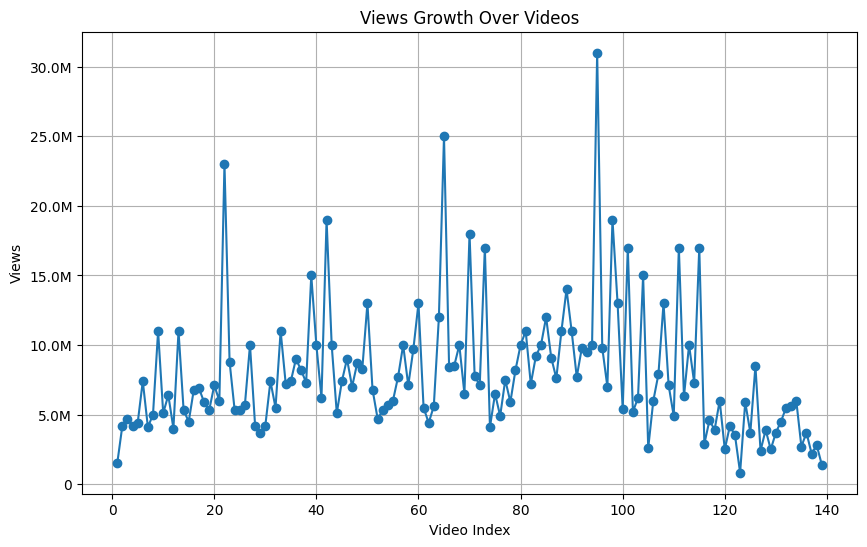

In [99]:
def main():
    channel_name = get_channel_name()
    driver = setup_webdriver()
    driver = search_and_navigate_channel(driver, channel_name)
    video_data = scroll_and_extract_data(driver)
    csv_file_path = create_csv(video_data, channel_name)
    df = read_csv(csv_file_path)
    display_result(df)
    plot_views_growth(df)

    
    driver.quit()

if __name__ == "__main__":
    main()